# Predictive Analysis of Heart Disease Dataset

## Introduction

In the United States, heart disease is the leading cause of death in both men and women. Coronary heart disease occurs the arteries struggle with supplying oxygen and nutrient-rich blood to heart. The most common cause is the buildup of fatty, cholesterol-containing plaques along the arteries, which narrow the passage of blood to the heart. Angina is a type of chest pain that is commonly attributed to heart disease. When blood flow to the heart is severely reduced or worse, the plaques dislodge and completely block blood flow to parts of the heart, it can cause a heart attack. As such, early detection of heart disease is an important field of research.

In the project, I am investigating whether a patient will be diagnosed with heart disease. More precisely, can chest pain type, max heart rate, and exercise induced angina accurately predict the prescence of heart disease in patients?

To answer this question, a heart disease dataset from the Cleveland database will be used. The database originally contains 76 attributes but the dataset contains a subset of 14 attributes. The dataset contains a mix of integer and categorical variables. The target variable is the diagnosis of heart disease which has a range of 0-5, with 0 being no heart disease. 

## Preliminary Exploratory Data Analysis

In [1]:
library(tidyverse)
library(tidymodels)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [67]:
url <- "https://raw.githubusercontent.com/deenahl/dsci-100-2024s-project/main/data/heart_disease/processed.cleveland.data"
data <- read_delim(url, delim=",", col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs","restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"))
categorical_variables <- c("sex", "cp", "fbs", "restecg", "exang", "slope", "thal", "target")
integer_variables <- c("age", "trestbps", "chol", "thalach", "oldpeak", "ca")
heart_disease_ds <- data |> 
                    mutate(across(all_of(categorical_variables), as_factor)) |>
                    mutate(across(all_of(integer_variables), as.integer)) |>
                    mutate(sex = fct_recode(sex, "Male"="1", "Female"="0")) |>
                    mutate(cp = fct_recode(cp, "Typical angina"="1", "Atypical angina"="2", "Non-anginal pain"="3", "Asymptomatic"="4")) |>
                    mutate(restecg = fct_recode(restecg, "Normal"="0", "ST-T wave abnormality"="1", "Left ventricular hypertrophy"="2")) |>
                    mutate(exang = fct_recode(exang, "True"="1", "False"="0")) |>
                    mutate(fbs = fct_recode(fbs, ">120 mg/dl"="1", "<=120 mg/dl"="0")) |> 
                    mutate(slope = fct_recode(slope, "Upsloding"="1", "Flat"="2", "Downsloping"="3")) |>
                    mutate(thal = fct_recode(thal, "Normal"="3.0", "Fixed defect"="6.0", "Reversable defect"="7.0")) |>
                    mutate(target = fct_recode(target, "No Heart Disease"="0", "Has Heart Disease"="1", "Has Heart Disease"="2", "Has Heart Disease"="3", "Has Heart Disease"="4"))
heart_disease_ds

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `across(all_of(integer_variables), as.integer)`.
Caused by warning:
! NAs introduced by coercion”


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>
63,Male,Typical angina,145,233,>120 mg/dl,Left ventricular hypertrophy,150,False,2,Downsloping,0,Fixed defect,No Heart Disease
67,Male,Asymptomatic,160,286,<=120 mg/dl,Left ventricular hypertrophy,108,True,1,Flat,3,Normal,Has Heart Disease
67,Male,Asymptomatic,120,229,<=120 mg/dl,Left ventricular hypertrophy,129,True,2,Flat,2,Reversable defect,Has Heart Disease
37,Male,Non-anginal pain,130,250,<=120 mg/dl,Normal,187,False,3,Downsloping,0,Normal,No Heart Disease
41,Female,Atypical angina,130,204,<=120 mg/dl,Left ventricular hypertrophy,172,False,1,Upsloding,0,Normal,No Heart Disease
56,Male,Atypical angina,120,236,<=120 mg/dl,Normal,178,False,0,Upsloding,0,Normal,No Heart Disease
62,Female,Asymptomatic,140,268,<=120 mg/dl,Left ventricular hypertrophy,160,False,3,Downsloping,2,Normal,Has Heart Disease
57,Female,Asymptomatic,120,354,<=120 mg/dl,Normal,163,True,0,Upsloding,0,Normal,No Heart Disease
63,Male,Asymptomatic,130,254,<=120 mg/dl,Left ventricular hypertrophy,147,False,1,Flat,1,Reversable defect,Has Heart Disease


Warning message in geom_histogram(stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


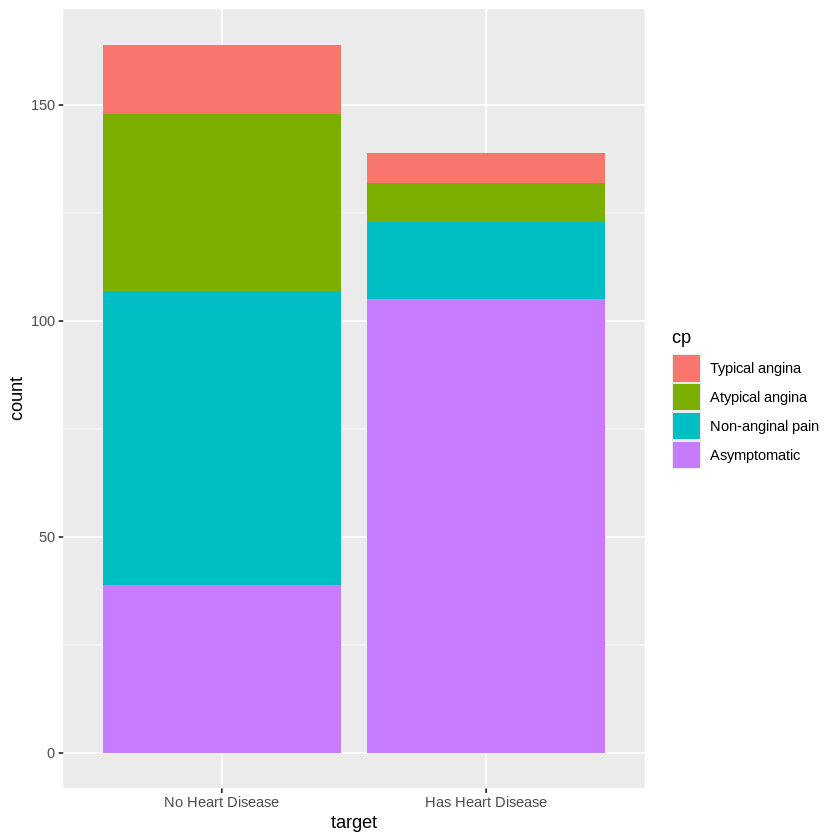

In [68]:
plot_1 <- heart_disease_ds |>
        group_by(cp, target) |>
        ggplot(aes(x = target, fill = cp)) +
        geom_histogram(stat = "count")
plot_1

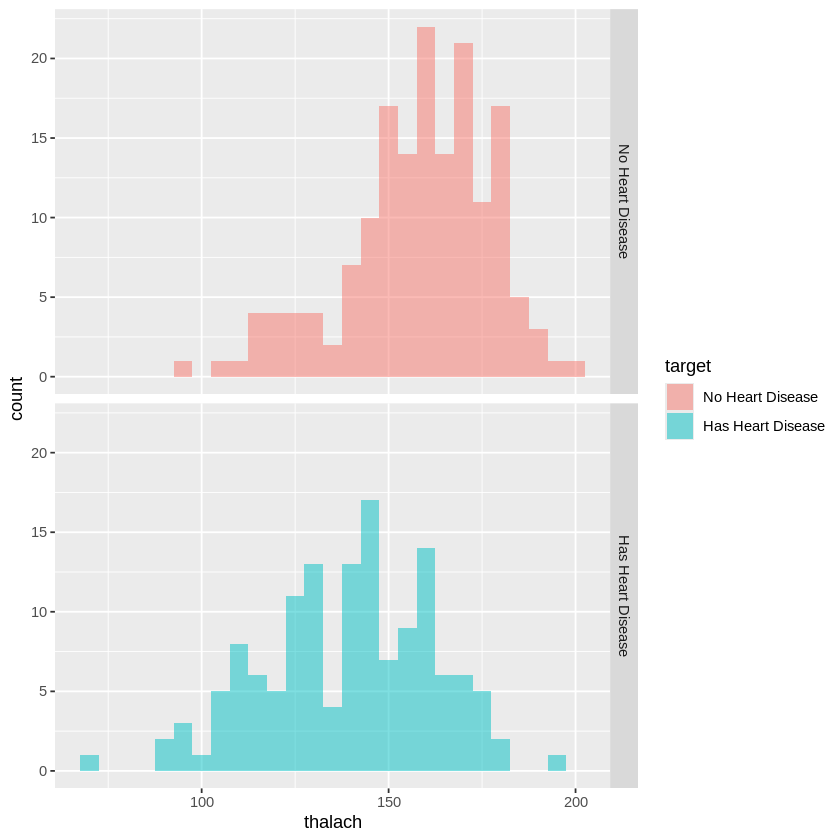

In [69]:
plot_2 <- heart_disease_ds |>
        ggplot(aes(x = thalach, fill = target)) +
        geom_histogram(alpha = 0.5, position="identity", bins = 30, binwidth = 5) +
        facet_grid(rows = vars(target))
plot_2

Warning message in geom_histogram(stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


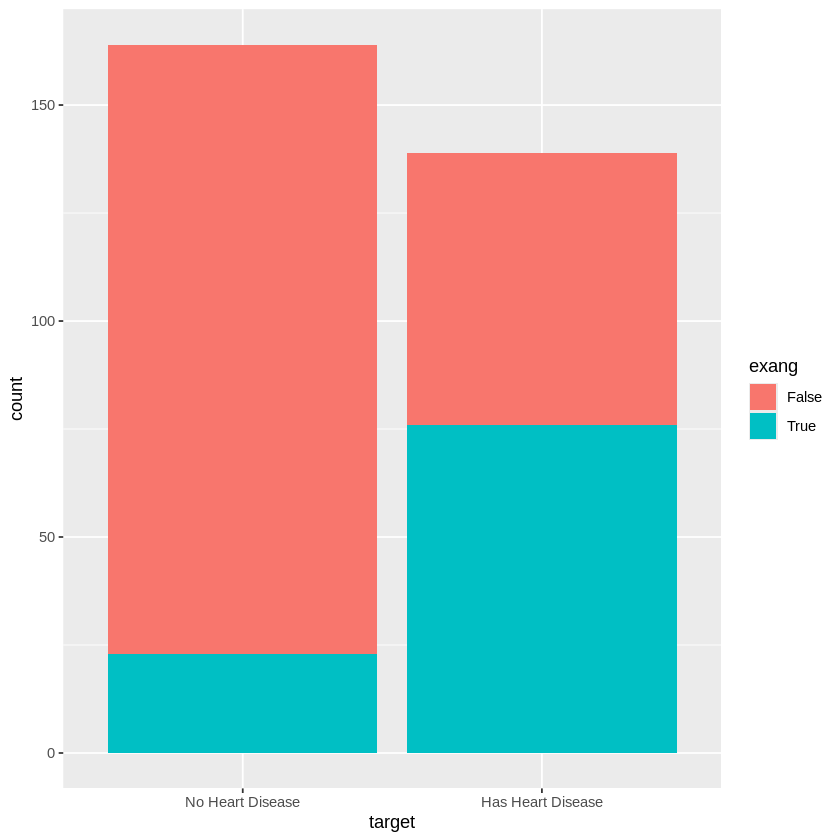

In [70]:
plot_3 <- heart_disease_ds |>
        group_by(exang, target) |>
        ggplot(aes(x = target, fill = exang)) +
        geom_histogram(stat = "count")
plot_3

Warning message in geom_histogram(stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


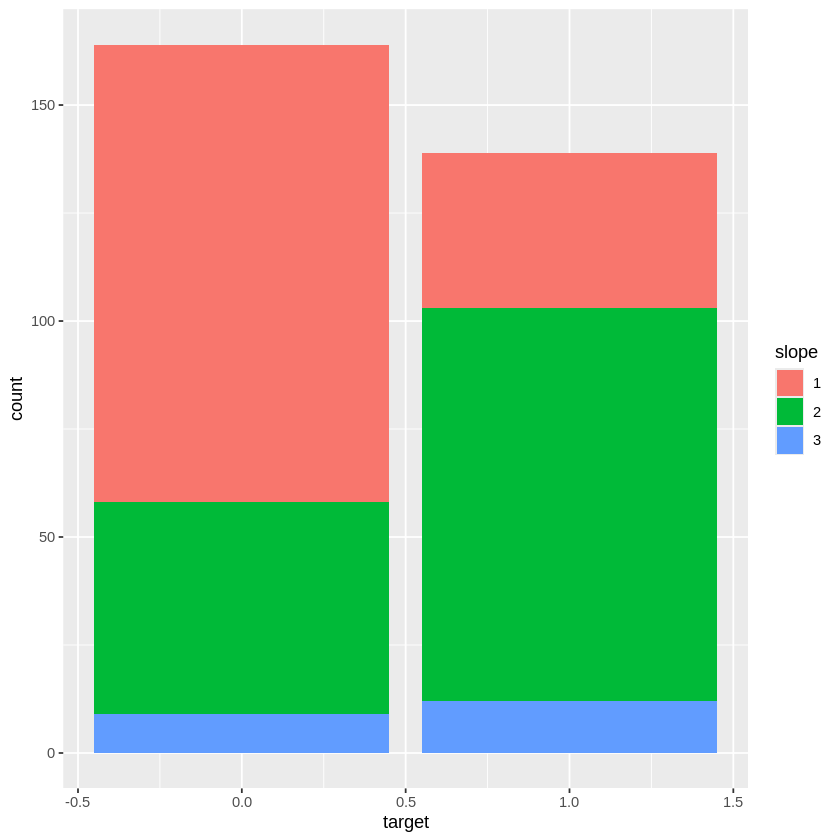

In [45]:
plot_5 <- heart_disease_ds |>
        group_by(slope, target) |>
        ggplot(aes(x = target, fill = slope)) +
        geom_histogram(stat = "count")
plot_5

Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

In [ ]:
set.seed(12)

hd_split <- initial_split(heart_disease_ds, prop = 0.74, strata = target)
hd_train <- training(hd_split) |>
            select("age", "sex", "cp", "chol", "ca", "target")

target_table <- hd_train |>
                group_by(target) |>
                summarize(count = n())

missing_data <- hd_train |>
                rowwise() |>
                mutate(missing = any(is.na(c(age, sex, cp, chol, ca, target)))) |>
                filter(missing == TRUE)

predictor_stats <- hd_train |>
                    summarize(mean_age = mean(age), 
                              mean_chol = mean(chol),
                              median_sex = median(as.numeric(sex)),
                              median_cp = median(as.numeric(cp)),
                              mean_ca = mean(ca, na.rm=TRUE))



# summary_table    
target_table
missing_data
predictor_stats

## Methods

For this data analysis, we will be creating a K-Nearest Neighbors classifier. The main predictors that will be investigated are: chest pain type, cholesterol levels, and the number of vessels coloured by fluoroscopy. Additionally, the effects of age and sex will also be investigated to see if these variables influence the prediction of heart disease. The data will be split into training and testing dataset, and standardized separately to ensure that the testing data does not influence model training. Using the training data, we will use cross-validation to fit and train the model several times to minimize overfitting of the data. We can optimize for number of folds and the number of neighbours in the model, before using the model to predict the presence of heart disease in the testing dataset. 

One way to visualization the results could be a table that lists the accuracy, precision, and recall of the testng data predictions. Additionally, we can visualize this information by plotting each data point on a 2D plot for chest pain type and cholesterol levels, and mapping border of a positive or negative prediction based on our model.

## Expected Outcomes and Significance

The impact of these finding could aid in early diagnosis of heart disease. This provides doctors more time to find a treatment that works for the patient, r

Expected outcomes and significance:
What do you expect to find?
What impact could such findings have?
What future questions could this lead to?